In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from scipy.stats import zscore
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV

In [2]:
#calling the files
country=pd.read_excel('country-code.xlsx')

In [3]:
country

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [4]:
zomato=pd.read_excel('zomato.xlsx')

In [5]:
zomato

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [6]:
#merging the three file into one single flie
final='final'
df_zo=pd.concat([country,zomato],ignore_index=True)
df_zo.to_csv(final,index=False)


In [7]:
df_zo

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,37,Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,94,Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9561,208,NaN,5915730.0,NamlÛ± Gurme,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,...,Turkish Lira(TL),No,No,No,No,3.0,4.1,Green,Very Good,788.0
9562,208,NaN,5908749.0,Ceviz AÛôacÛ±,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,...,Turkish Lira(TL),No,No,No,No,3.0,4.2,Green,Very Good,1034.0
9563,208,NaN,5915807.0,Huqqa,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,...,Turkish Lira(TL),No,No,No,No,4.0,3.7,Yellow,Good,661.0
9564,208,NaN,5916112.0,Aôôk Kahve,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,...,Turkish Lira(TL),No,No,No,No,4.0,4.0,Green,Very Good,901.0


 Zomato Data Analysis is for foodies who want to taste the bestcuisines of every part of the world in their budget, 
this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of restaurants.
This problem statement contains two datasets- Zomato.csv and country_code.csv.



In [8]:
df_zo.head()

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,37,Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,94,Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


first five rows and columns

In [9]:
df_zo.shape

(9566, 22)

This dataset contain total 9566 rows and 22 columns

In [10]:
df_zo.columns

Index(['Country Code', 'Country', 'Restaurant ID', 'Restaurant Name', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

name of all the columns present in the dataset.

In [11]:
df_zo.nunique().to_frame('No of unique values')

,No of unique values
Country Code,15
Country,15
Restaurant ID,9551
Restaurant Name,7446
City,141
Address,8918
Locality,1208
Locality Verbose,1265
Longitude,8120
Latitude,8677


This are the unique values present in each column.

In [12]:
df_zo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9566 entries, 0 to 9565
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9566 non-null   int64  
 1   Country               15 non-null     object 
 2   Restaurant ID         9551 non-null   float64
 3   Restaurant Name       9551 non-null   object 
 4   City                  9551 non-null   object 
 5   Address               9551 non-null   object 
 6   Locality              9551 non-null   object 
 7   Locality Verbose      9551 non-null   object 
 8   Longitude             9551 non-null   float64
 9   Latitude              9551 non-null   float64
 10  Cuisines              9542 non-null   object 
 11  Average Cost for two  9551 non-null   float64
 12  Currency              9551 non-null   object 
 13  Has Table booking     9551 non-null   object 
 14  Has Online delivery   9551 non-null   object 
 15  Is delivering now    

This shows the dtype, null values and total columns.
there are 7 float, 1 int and 14 object dtype.
This shows that there are missing values in the columns.

In [13]:
df_zo.isnull().sum()

Country Code               0
Country                 9551
Restaurant ID             15
Restaurant Name           15
City                      15
Address                   15
Locality                  15
Locality Verbose          15
Longitude                 15
Latitude                  15
Cuisines                  24
Average Cost for two      15
Currency                  15
Has Table booking         15
Has Online delivery       15
Is delivering now         15
Switch to order menu      15
Price range               15
Aggregate rating          15
Rating color              15
Rating text               15
Votes                     15
dtype: int64

this are the count of missing values present in each column.

In [14]:
#filling the null values
df_zo=df_zo.fillna(0)

In [15]:
df_zo

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,0.0,0,0,0,0,0,0.000000,0.000000,...,0,0,0,0,0,0.0,0.0,0,0,0.0
1,14,Australia,0.0,0,0,0,0,0,0.000000,0.000000,...,0,0,0,0,0,0.0,0.0,0,0,0.0
2,30,Brazil,0.0,0,0,0,0,0,0.000000,0.000000,...,0,0,0,0,0,0.0,0.0,0,0,0.0
3,37,Canada,0.0,0,0,0,0,0,0.000000,0.000000,...,0,0,0,0,0,0.0,0.0,0,0,0.0
4,94,Indonesia,0.0,0,0,0,0,0,0.000000,0.000000,...,0,0,0,0,0,0.0,0.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9561,208,0,5915730.0,NamlÛ± Gurme,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,...,Turkish Lira(TL),No,No,No,No,3.0,4.1,Green,Very Good,788.0
9562,208,0,5908749.0,Ceviz AÛôacÛ±,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,...,Turkish Lira(TL),No,No,No,No,3.0,4.2,Green,Very Good,1034.0
9563,208,0,5915807.0,Huqqa,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,...,Turkish Lira(TL),No,No,No,No,4.0,3.7,Yellow,Good,661.0
9564,208,0,5916112.0,Aôôk Kahve,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,...,Turkish Lira(TL),No,No,No,No,4.0,4.0,Green,Very Good,901.0


filling all the null values with 0.

<Axes: >

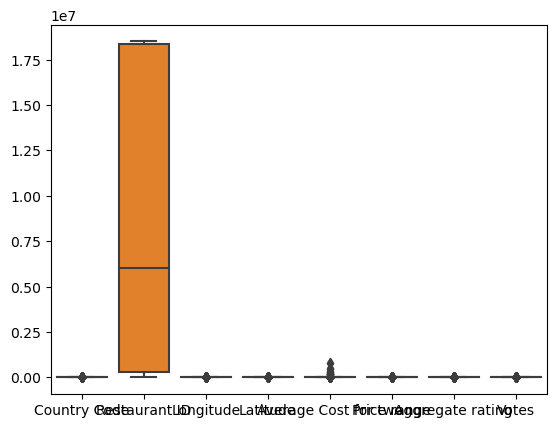

In [16]:
#dropping of duplicates values
df_zo.drop_duplicates(inplace=True)
sns.boxplot(df_zo)

In [17]:
df_zo.duplicated().sum()

0

we can see that there are no duplicate values.

<Axes: >

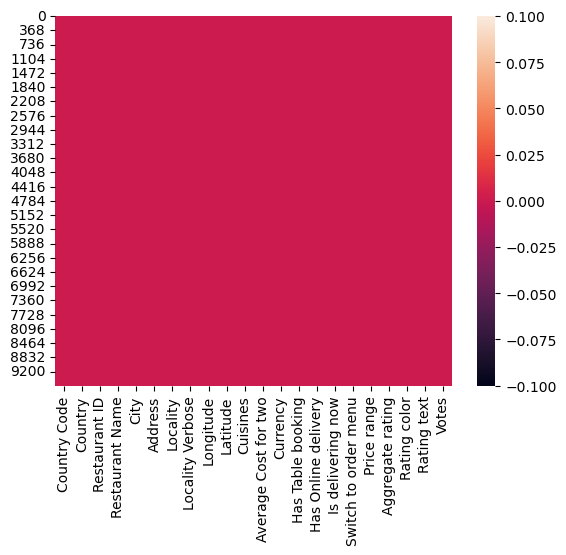

In [18]:
sns.heatmap(df_zo.isnull())

After filling all the null values we can see that there are no null values with the help of heatmap.
As it contain one colour (bright red) which is shown on the scale that is not negative so that means it has no null values.

In [19]:
df_zo.describe()

,Country Code,Restaurant ID,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9566.000000,9.566000e+03,9566.000000,9566.000000,9566.000000,9566.000000,9566.000000,9566.000000
mean,18.553105,9.036936e+06,64.026021,25.813840,1197.330337,1.802007,2.662189,156.663705
std,56.985333,8.791923e+06,41.512155,11.046775,16108.607246,0.907712,1.518857,429.876554
min,1.000000,0.000000e+00,-157.948486,-41.330428,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.018882e+05,77.081065,28.478035,250.000000,1.000000,2.500000,5.000000
50%,1.000000,6.001752e+06,77.191820,28.570360,400.000000,2.000000,3.200000,31.000000
75%,1.000000,1.835228e+07,77.281702,28.642718,700.000000,2.000000,3.700000,130.000000
max,216.000000,1.850065e+07,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


#This shows the statistical information of the numerical columns.
It has no negative values from the above abservation we can say that-

The count of all columns are same that means it has no missing values. 
The median(50%) value is greater than mean in most of the columns, which means data is skewed to the left. 
There is huge difference between the max and 75% so there are outliers present in the data. 
The standard deviation,25% percentile value and min can be notice by this describe method.

In [20]:
#checking correlation
df_zo.corr()

,Country Code,Restaurant ID,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
Country Code,1.000000,0.144238,-0.698652,0.011921,0.042768,0.234851,0.274360,0.152557
Restaurant ID,0.144238,1.000000,-0.222981,-0.048041,-0.001572,-0.130807,-0.322324,-0.146297
Longitude,-0.698652,-0.222981,1.000000,0.048602,0.045985,-0.073737,-0.112071,-0.084051
Latitude,0.011921,-0.048041,0.048602,1.000000,-0.110337,-0.158171,0.006945,-0.021524
Average Cost for two,0.042768,-0.001572,0.045985,-0.110337,1.000000,0.075082,0.051871,0.067818
Price range,0.234851,-0.130807,-0.073737,-0.158171,0.075082,1.000000,0.440997,0.309589
Aggregate rating,0.274360,-0.322324,-0.112071,0.006945,0.051871,0.440997,1.000000,0.313903
Votes,0.152557,-0.146297,-0.084051,-0.021524,0.067818,0.309589,0.313903,1.000000


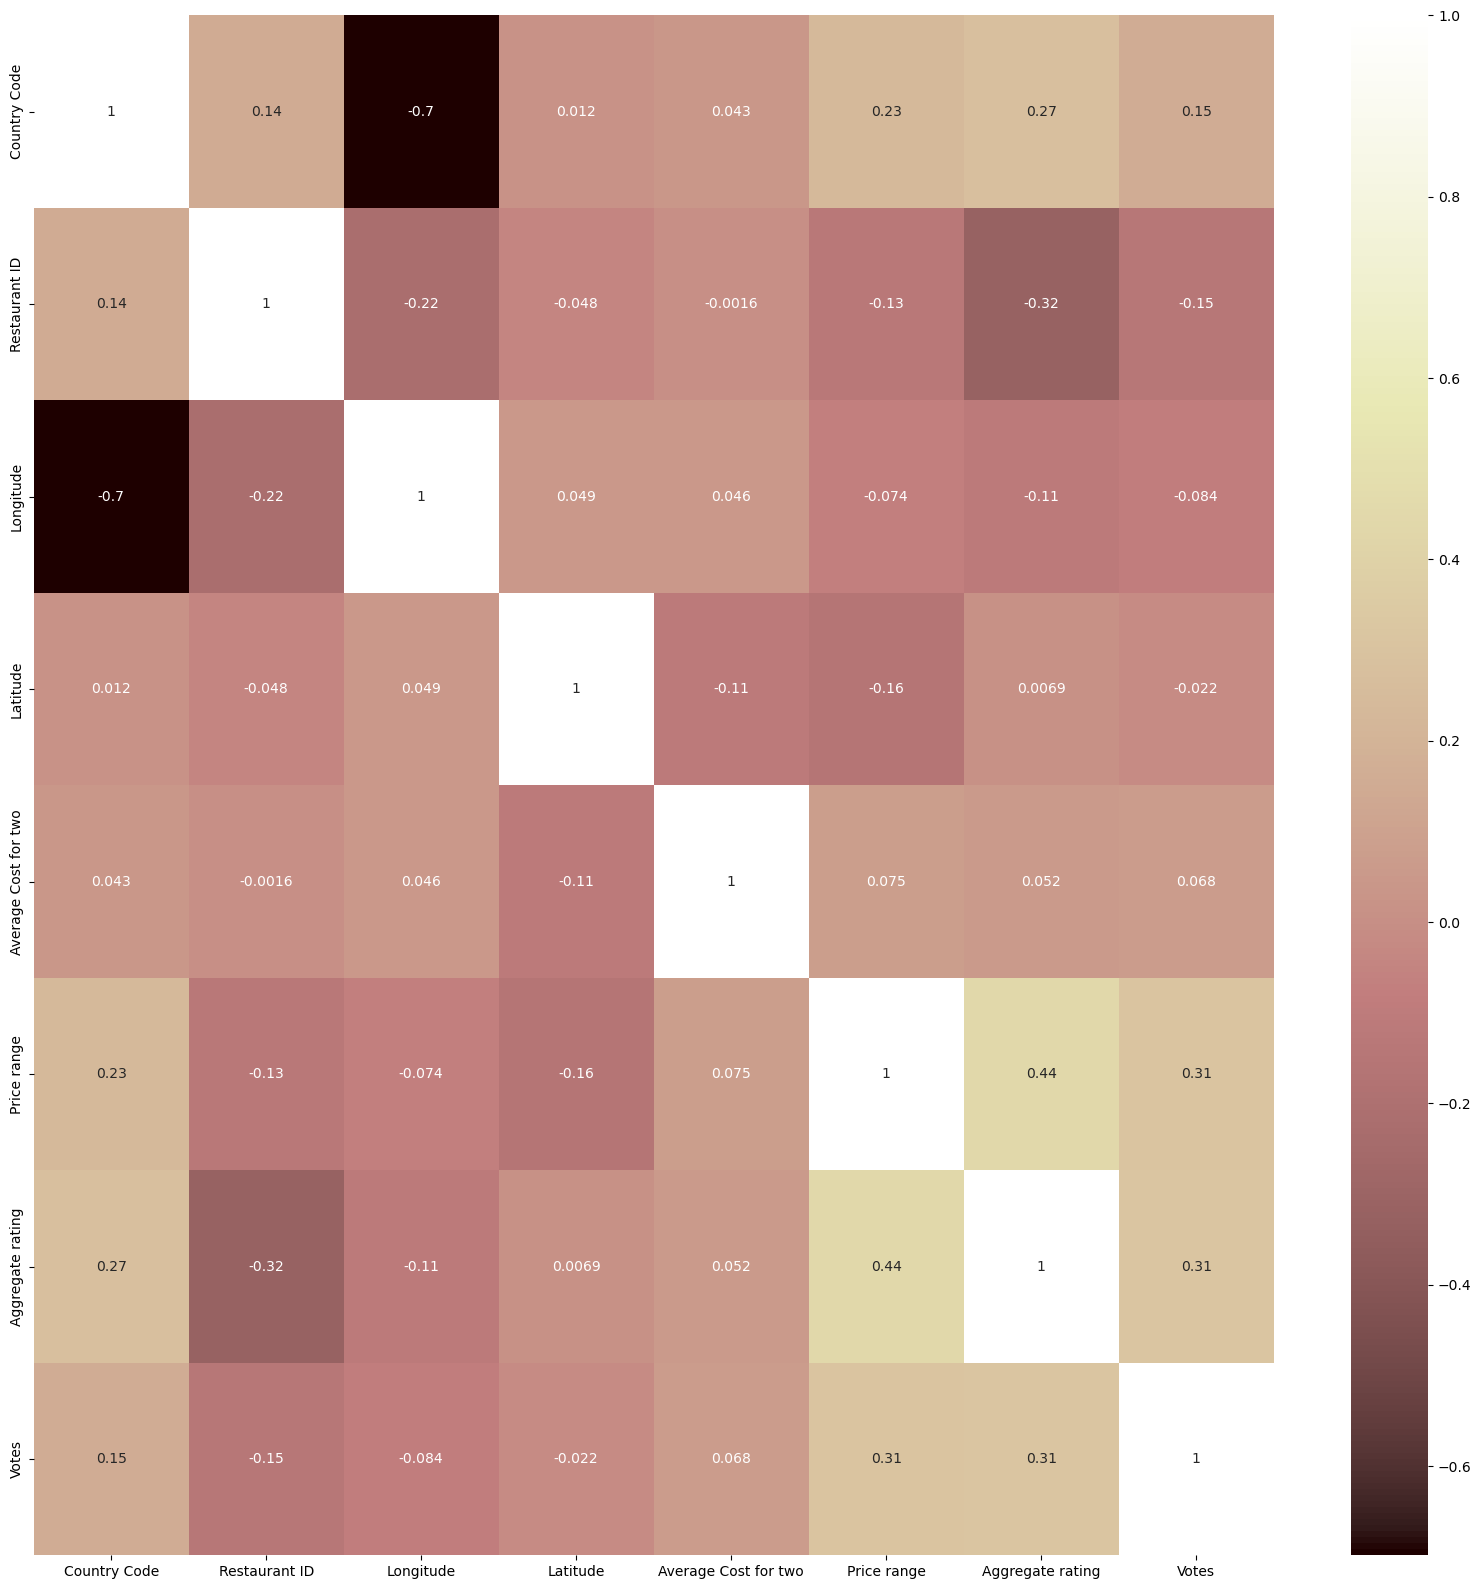

In [21]:
#checking of correlation with the heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df_zo.corr(),cmap='pink',annot=True)
plt.show()

This is the correlation through heatmap, the light coloure is for positive correlation and dark colour is for negative correlation.
1. we can see that country code is highly negatively correlated with longhtude.
2.Price rang has possitive correlation with aggregate rating.

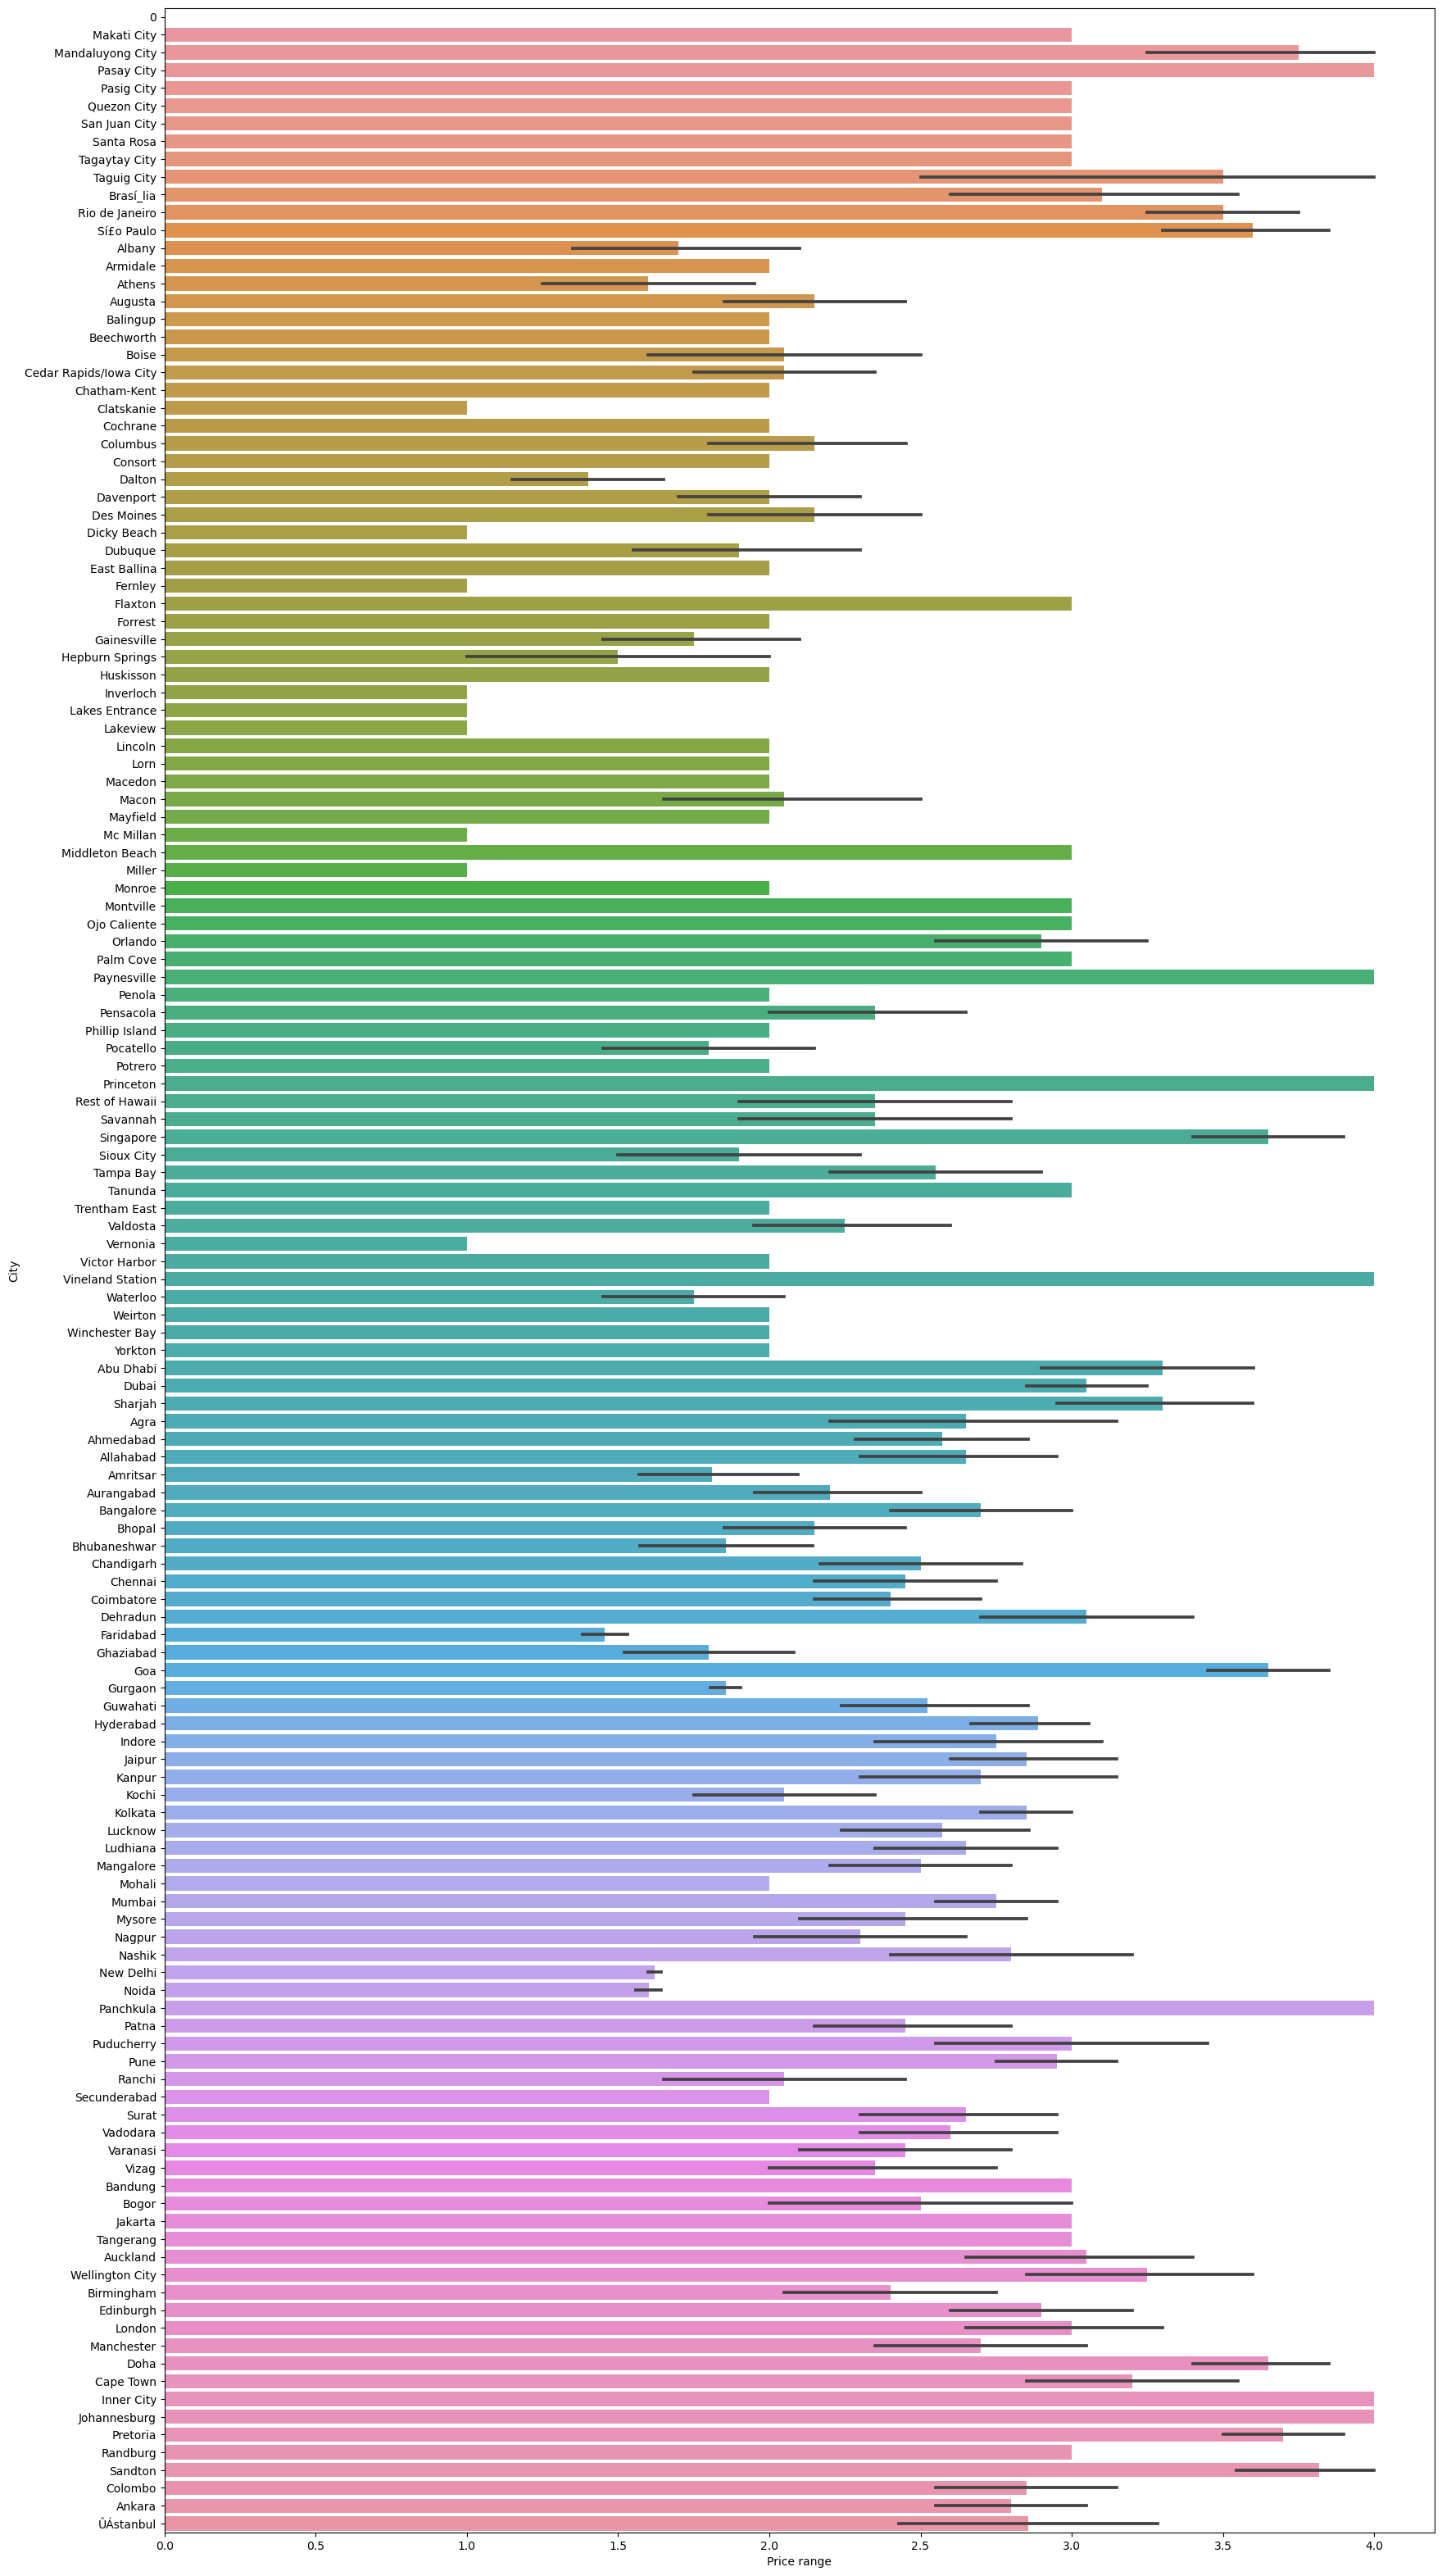

In [22]:
#Lets check the relation between Price range and city
plt.figure(figsize = (20,40))
sns.barplot(x = "Price range", y = "City", data = df_zo)
plt.show()

The price range varies according to the city.
Pasy, Paynesville, Princeton, Vineland Station, Panchkula, Inner City and Johannesburg hhas the highest price range 
among all city.

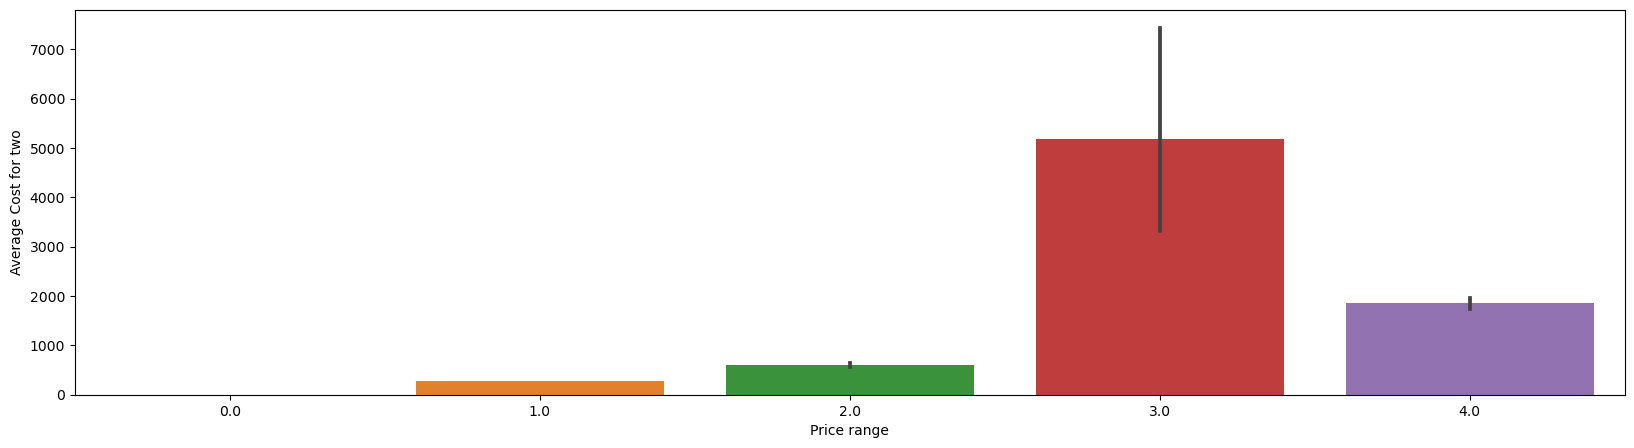

In [23]:
#Lets check the relation between Price range and city
plt.figure(figsize = (20,5))
sns.barplot(x = "Price range", y = "Average Cost for two", data = df_zo)
plt.show()

the average cost for two no3 has higest price range, crossing over 5000.

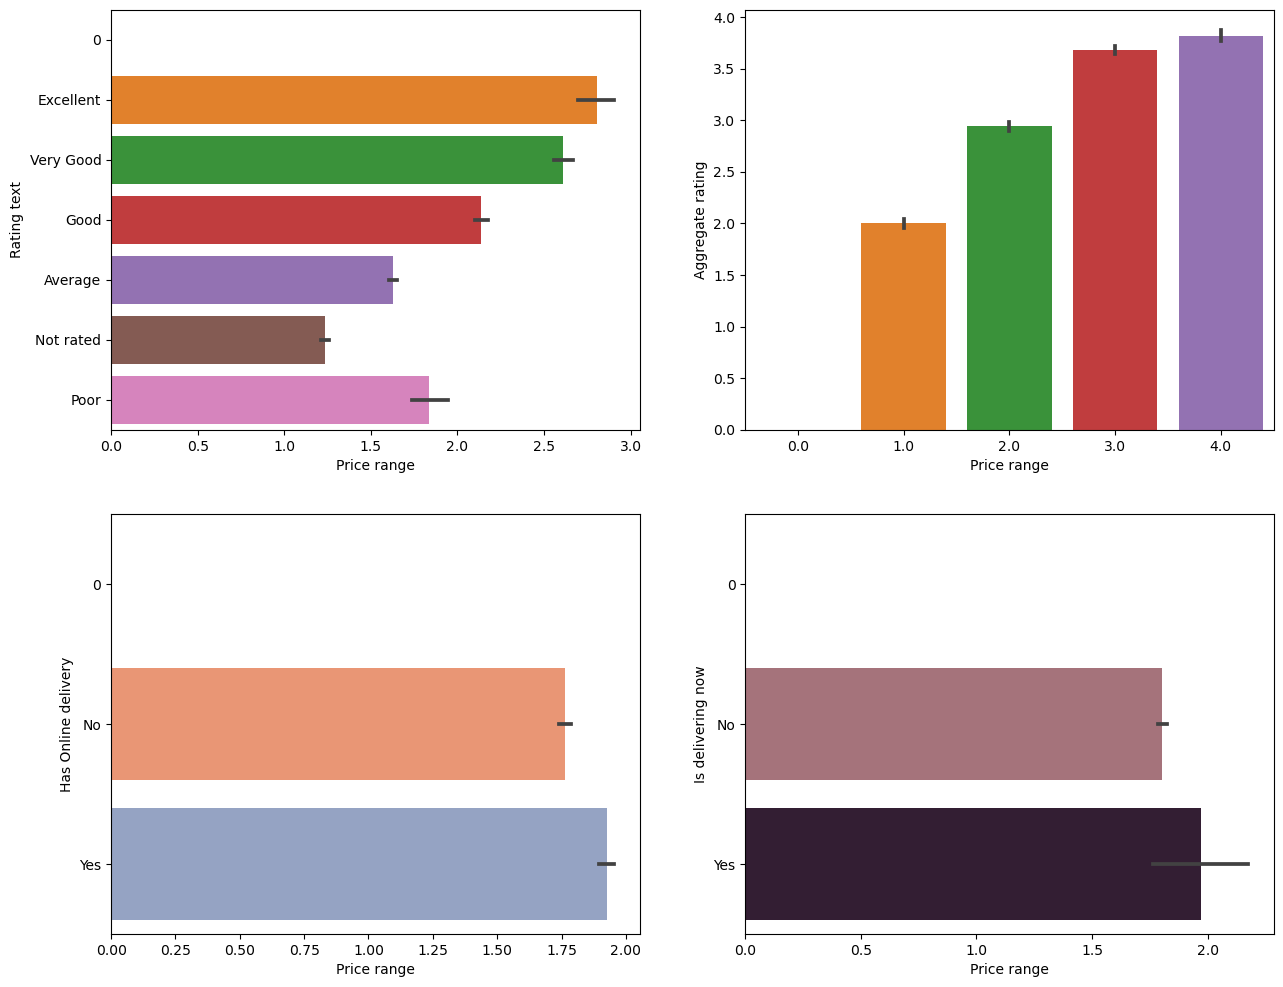

In [24]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

sns.barplot(x='Price range',y='Rating text',ax=axes[0,0],data=df_zo)

sns.barplot(x='Price range',y='Aggregate rating',ax=axes[0,1],data=df_zo)

sns.barplot(x='Price range',y='Has Online delivery',ax=axes[1,0],data=df_zo,palette="Set2")

sns.barplot(x='Price range',y='Is delivering now',ax=axes[1,1],data=df_zo,palette="ch:.25")
plt.show()

The excellent rating has the highest price range.
Aggregate rating 4 has the highest price range.
Yes Online delivery has highest price range'
Yes develing now has the highest price range.
All this factor affects the price range of a restaurant.

In [25]:
#dropping the column.
df_zo.drop(['Longitude','Latitude','Rating color','Restaurant ID','Locality Verbose','Country'],axis=1,inplace=True)

In [26]:
# Sort columns by datatypes
df_zo.columns.to_series().groupby(df_zo.dtypes).groups

{int64: ['Country Code'], float64: ['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'], object: ['Restaurant Name', 'City', 'Address', 'Locality', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating text']}

In [27]:
#converting the mix data into numerical data
pd.to_numeric(df_zo['Country Code'], errors='coerce').fillna(0)
df_zo["Country Code"] = pd.to_numeric(df_zo['Country Code'], errors='coerce').fillna(0)

pd.to_numeric(df_zo['Restaurant Name'], errors='coerce').fillna(0)
df_zo["Restaurant Name"] = pd.to_numeric(df_zo['Restaurant Name'], errors='coerce').fillna(0)

pd.to_numeric(df_zo['City'], errors='coerce').fillna(0)
df_zo["City"] = pd.to_numeric(df_zo['City'], errors='coerce').fillna(0)

pd.to_numeric(df_zo['Address'], errors='coerce').fillna(0)
df_zo["Address"] = pd.to_numeric(df_zo['Address'], errors='coerce').fillna(0)

pd.to_numeric(df_zo['Locality'], errors='coerce').fillna(0)
df_zo["Locality"] = pd.to_numeric(df_zo['Locality'], errors='coerce').fillna(0)

pd.to_numeric(df_zo['Cuisines'], errors='coerce').fillna(0)
df_zo['Cuisines'] = pd.to_numeric(df_zo['Cuisines'], errors='coerce').fillna(0)

pd.to_numeric(df_zo['Currency'], errors='coerce').fillna(0)
df_zo['Currency'] = pd.to_numeric(df_zo['Currency'], errors='coerce').fillna(0)

pd.to_numeric(df_zo['Has Table booking'], errors='coerce').fillna(0)
df_zo["Has Table booking"] = pd.to_numeric(df_zo['Has Table booking'], errors='coerce').fillna(0)

pd.to_numeric(df_zo['Has Online delivery'], errors='coerce').fillna(0)
df_zo["Has Online delivery"] = pd.to_numeric(df_zo['Has Online delivery'], errors='coerce').fillna(0)


pd.to_numeric(df_zo['Is delivering now'], errors='coerce').fillna(0)
df_zo["Is delivering now"] = pd.to_numeric(df_zo['Is delivering now'], errors='coerce').fillna(0)

pd.to_numeric(df_zo['Switch to order menu'], errors='coerce').fillna(0)
df_zo["Switch to order menu"] = pd.to_numeric(df_zo['Switch to order menu'], errors='coerce').fillna(0)

pd.to_numeric(df_zo['Rating text'], errors='coerce').fillna(0)
df_zo["Rating text"] = pd.to_numeric(df_zo['Rating text'], errors='coerce').fillna(0)

Country Code               Axes(0.125,0.786098;0.227941x0.0939024)
Restaurant Name         Axes(0.398529,0.786098;0.227941x0.0939024)
City                    Axes(0.672059,0.786098;0.227941x0.0939024)
Address                    Axes(0.125,0.673415;0.227941x0.0939024)
Locality                Axes(0.398529,0.673415;0.227941x0.0939024)
Cuisines                Axes(0.672059,0.673415;0.227941x0.0939024)
Average Cost for two       Axes(0.125,0.560732;0.227941x0.0939024)
Currency                Axes(0.398529,0.560732;0.227941x0.0939024)
Has Table booking       Axes(0.672059,0.560732;0.227941x0.0939024)
Has Online delivery        Axes(0.125,0.448049;0.227941x0.0939024)
Is delivering now       Axes(0.398529,0.448049;0.227941x0.0939024)
Switch to order menu    Axes(0.672059,0.448049;0.227941x0.0939024)
Price range                Axes(0.125,0.335366;0.227941x0.0939024)
Aggregate rating        Axes(0.398529,0.335366;0.227941x0.0939024)
Rating text             Axes(0.672059,0.335366;0.227941x0.0939

<Figure size 1500x2000 with 0 Axes>

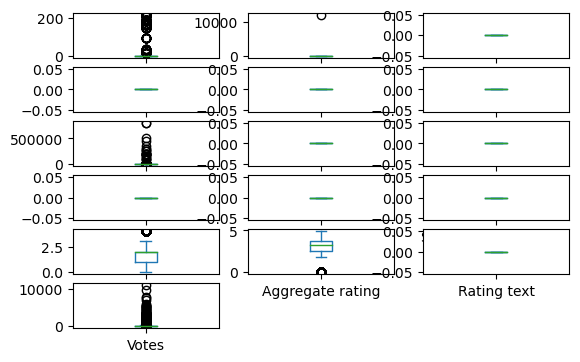

In [28]:
#checking for outliers
fig=plt.figure(figsize=(15,20))
df_zo.plot(kind='box',subplots=True,layout=(7,3))

We can see the presence of outliers.

In [29]:
#removing outliers
out=df_zo[['Votes','Country Code','Restaurant Name']]
z=np.abs(zscore(out))
z

,Votes,Country Code,Restaurant Name
0,0.364458,0.308045,0.010225
1,0.364458,0.079904,0.010225
2,0.364458,0.200885,0.010225
3,0.364458,0.323730,0.010225
4,0.364458,1.324040,0.010225
...,...,...,...
9561,1.468722,3.324659,0.010225
9562,2.041010,3.324659,0.010225
9563,1.173273,3.324659,0.010225
9564,1.731602,3.324659,0.010225


In [30]:
np.where(z>3)

(array([  10,   11,   12,   13,   14,   97,   98,   99,  100,  101,  102,
         103,  104,  105,  106,  107,  108,  109,  110,  111,  112,  113,
         114,  115,  116,  118,  118,  119,  120,  121,  122,  123,  124,
         125,  126,  127,  128,  129,  130,  131,  132,  133,  134,  135,
         136,  137,  138,  139,  140,  141,  142,  143,  144,  145,  146,
         147,  148,  149,  150,  151,  152,  153,  154,  155,  156,  157,
         160,  161,  162,  163,  164,  165,  166,  167,  168,  169,  170,
         171,  172,  173,  174,  175,  176,  177,  178,  179,  180,  181,
         182,  183,  184,  185,  186,  187,  188,  189,  190,  191,  192,
         193,  194,  195,  196,  197,  198,  199,  201,  202,  203,  204,
         205,  206,  207,  208,  209,  210,  211,  212,  213,  214,  215,
         216,  217,  218,  219,  220,  221,  222,  224,  225,  226,  227,
         228,  229,  230,  231,  232,  233,  234,  235,  236,  237,  238,
         239,  240,  241,  242,  243, 

In [31]:
df_zo=df_zo[(z<3).all(axis=1)]
df_zo.shape

(8777, 16)

In [32]:
#checking skewness
df_zo.skew()

Country Code             6.818369
Restaurant Name          0.000000
City                     0.000000
Address                  0.000000
Locality                 0.000000
Cuisines                 0.000000
Average Cost for two    37.374543
Currency                 0.000000
Has Table booking        0.000000
Has Online delivery      0.000000
Is delivering now        0.000000
Switch to order menu     0.000000
Price range              0.990019
Aggregate rating        -0.883316
Rating text              0.000000
Votes                    3.569023
dtype: float64

In [33]:
x=df_zo.iloc[:,:-1]
y=df_zo.iloc[:,-1]

In [34]:
#seperating independent and target variables
x=df_zo.drop('Average Cost for two',axis=1)
y=df_zo['Average Cost for two']
print('feature dimension',x.shape)
print('label dimension',y.shape)

feature dimension (8777, 15)
label dimension (8777,)


In [35]:
#scaling of data
st=StandardScaler()
x=st.fit_transform(x)
x

array([[-0.15443296,  0.        ,  0.        , ..., -1.67572396,
         0.        , -0.52020738],
       [ 0.39007912,  0.        ,  0.        , ..., -1.67572396,
         0.        , -0.52020738],
       [ 1.06024783,  0.        ,  0.        , ..., -1.67572396,
         0.        , -0.52020738],
       ...,
       [ 7.72004943,  0.        ,  0.        , ...,  1.22977408,
         0.        , -0.03500235],
       [ 7.72004943,  0.        ,  0.        , ...,  1.22977408,
         0.        ,  3.48542967],
       [ 7.72004943,  0.        ,  0.        , ...,  0.8335698 ,
         0.        ,  1.58234773]])

# MODEL BUILDING

In [36]:
from sklearn.metrics import r2_score
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import metrics

In [37]:
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pre=lr.predict(x_test)
    acc=r2_score(y_test,pre)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Best accuracy',maxAccu,'at random state',maxRs)        
    

Best accuracy 0.05027050777864428 at random state 24


In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRs)

In [39]:
#support vector regression
svr=SVR()
svr.fit(x_train,y_train)
pre=svr.predict(x_test)
pred=svr.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

-0.0003939907685275301
-0.009015446176352526
Mean absolute error: 623.9092534590897
Mean square error: 90538831.32085389
Root mean square error: 9515.189505251794


In [40]:
#Randomforest
ra=RandomForestRegressor()
ra.fit(x_train,y_train)
pre=ra.predict(x_test)
pred=ra.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.9173385832826835
-8.694775642731202
Mean absolute error: 575.3409216967272
Mean square error: 98402108.1846532
Root mean square error: 9919.783676303288


In [41]:
#KNN
knn=KNN()
knn.fit(x_train,y_train)
pre=knn.predict(x_test)
pred=knn.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.7140226056104358
45.94063842802297
Mean absolute error: 445.1941533788915
Mean square error: 48940302.00019742
Root mean square error: 6995.734557585602


In [42]:
#Extratrees regressor
ex=ExtraTreesRegressor()
ex.fit(x_train,y_train)
pre=ex.predict(x_test)
pred=ex.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.9996910027901476
-84.66935964120759
Mean absolute error: 659.5023745300616
Mean square error: 167182407.78686363
Root mean square error: 12929.90362635637


In [43]:
#Linear regression
lr=LinearRegression()
lr.fit(x_train,y_train)
pre=lr.predict(x_test)
pred=lr.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.02004177435606047
5.027050777864428
Mean absolute error: 1094.1402237761977
Mean square error: 85979646.84788536
Root mean square error: 9272.521062142989


# CROSS VAKIDATION

In [44]:
# Cv score for support vector
score= cross_val_score(svr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[ 0.36001637  0.40943442  0.49843043  0.31863047 -0.00545582]
0.316211173414334
difference between R2score and cross validation -26.594066563568973


cross validation score of svr is 0.316211173414334

In [45]:
# Cv score for Random forest
score= cross_val_score(ra,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[-3.19460914e+01 -1.32071220e+00  8.11265878e-01  7.45814084e-01
 -6.45113930e-03]
-6.343234959507757
difference between R2score and cross validation 639.3505467286401


crossvalidation score of randomforest regressor is -6.343234959507757

In [46]:
# Cv score for KNN
score= cross_val_score(knn,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[ 0.31083529  0.73598882  0.83206749  0.73906301 -0.00263322]
0.5230642782197699
difference between R2score and cross validation -47.27937704411256


cross validation score of KNN is 0.5230642782197699

In [47]:
# Cv score for Extatrees regressor
score= cross_val_score(ex,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[-3.74673026e+02  6.07818350e-01  7.44238820e-01  7.08606887e-01
 -6.24963081e-03]
-74.52372235451192
difference between R2score and cross validation 7457.399286229057


cross validation score of ExtraTrees Regressor is -74.52372235451192

In [48]:
# Cv score for Linear regression
score= cross_val_score(lr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[-3.13450758e+01 -1.41424430e+01 -2.04646640e+00 -3.85056165e-01
 -4.40856260e-03]
-9.584689981762523
difference between R2score and cross validation 963.4960489541168


cross validation score of liear regression is -9.584689981762523

KNN is our best model as difference between the R2 score and cross validation is least

# SETTING PARAMETERS

In [49]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [56]:
para={'n_neighbors':[5],
      'weights':['uniform','distance'],
     'n_jobs':[None],
     'p':[2]}
knn_cv=GridSearchCV(knn,para,cv=5)
knn_cv.fit(x_train,y_train)
print(knn_cv.best_params_)

{'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [57]:
#setting new parameters
knn_new=KNN(n_jobs=None,n_neighbors=5,p=2,weights='uniform')
knn_new.fit(x_train,y_train)
y_pred_new=knn_new.predict(x_test)
print(metrics.r2_score(y_test,y_pred_new))

0.45940638428022973


In [58]:
#checking the score of new set parameters
knn_new.fit(x_train,y_train)
pre=knn_new.predict(x_test)
print('R2 score:',r2_score(y_test,pre))
print('mean absolute error:',mean_absolute_error(y_test,pre))
print('mean square error;',mean_squared_error(y_test,pre))
print('root mean squre error:',np.sqrt(mean_squared_error(y_test,pre)))

R2 score: 0.45940638428022973
mean absolute error: 445.1941533788915
mean square error; 48940302.00019742
root mean squre error: 6995.734557585602


In [60]:
#importing pickle and saving the file
import joblib
import pickle
filename="Average cost for two.pkl"
pickle.dump(knn_new,open(filename,'wb'))

In [61]:
load_m=pickle.load(open('Average cost for two.pkl','rb'))

In [62]:
result=load_m.score(x_test,y_test)
print(result*100)

45.94063842802297


In [63]:
con=pd.DataFrame([load_m.predict(x_test)[:],y_test[:]],index=['predicted','orginal'])
con

,0,1,2,3,4,5,6,7,8,9,...,2624,2625,2626,2627,2628,2629,2630,2631,2632,2633
predicted,1059.0,650.0,240.0,670.0,560.0,1400.0,360.0,340.0,2900.0,1180.0,...,1160.0,640.0,700.0,250.0,510.0,340.0,190.0,600.0,660.0,590.0
orginal,450.0,700.0,200.0,700.0,600.0,1700.0,350.0,300.0,2000.0,1200.0,...,1200.0,550.0,500.0,200.0,600.0,200.0,150.0,600.0,800.0,900.0


# BUILDING MODEL FOR PRICE RANGE

In [58]:
#seperating independent and target variables
x=df_zo.drop('Price range',axis=1)
y=df_zo['Price range']
print('feature dimension',x.shape)
print('label dimension',y.shape)

feature dimension (8777, 15)
label dimension (8777,)


In [59]:
#scaling of data
st=StandardScaler()
x=st.fit_transform(x)
x

array([[-0.15443296,  0.        ,  0.        , ..., -1.67572396,
         0.        , -0.52020738],
       [ 0.39007912,  0.        ,  0.        , ..., -1.67572396,
         0.        , -0.52020738],
       [ 1.06024783,  0.        ,  0.        , ..., -1.67572396,
         0.        , -0.52020738],
       ...,
       [ 7.72004943,  0.        ,  0.        , ...,  1.22977408,
         0.        , -0.03500235],
       [ 7.72004943,  0.        ,  0.        , ...,  1.22977408,
         0.        ,  3.48542967],
       [ 7.72004943,  0.        ,  0.        , ...,  0.8335698 ,
         0.        ,  1.58234773]])

In [60]:
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pre=lr.predict(x_test)
    acc=r2_score(y_test,pre)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Best accuracy',maxAccu,'at random state',maxRs)        
    

Best accuracy 0.3283423882916945 at random state 62


In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRs)

In [62]:
#support vector regression
svr=SVR()
svr.fit(x_train,y_train)
pre=svr.predict(x_test)
pred=svr.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.7278063561740602
70.03868190557641
Mean absolute error: 0.3290352216615342
Mean square error: 0.23158064941936082
Root mean square error: 0.48122827163349496


In [63]:
#Randomforest
ra=RandomForestRegressor()
ra.fit(x_train,y_train)
pre=ra.predict(x_test)
pred=ra.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.9939476631065775
96.03741441342606
Mean absolute error: 0.05036735726940738
Mean square error: 0.030628096555250808
Root mean square error: 0.1750088470770858


In [64]:
#KNN
knn=KNN()
knn.fit(x_train,y_train)
pre=knn.predict(x_test)
pred=knn.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.8525761038287754
76.20515540219624
Mean absolute error: 0.24168564920273344
Mean square error: 0.18391799544419132
Root mean square error: 0.42885661408469766


In [65]:
#Extratrees regressor
ex=ExtraTreesRegressor()
ex.fit(x_train,y_train)
pre=ex.predict(x_test)
pred=ex.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.9991693492440206
95.20259482255614
Mean absolute error: 0.056099088838268786
Mean square error: 0.037080685269552015
Root mean square error: 0.19256345777315076


In [66]:
#Linear regression
lr=LinearRegression()
lr.fit(x_train,y_train)
pre=lr.predict(x_test)
pred=lr.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.26751047342947876
32.83423882916945
Mean absolute error: 0.5663862055217243
Mean square error: 0.5191457379033532
Root mean square error: 0.7205176874326911


# CROSS VALIDATION

In [67]:
# Cv score for support vector
score= cross_val_score(svr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[0.56854025 0.72222304 0.69316378 0.65577864 0.70852794]
0.6696467304043309
difference between R2score and cross validation -34.13043421126364


cross validation score of SVR is 0.6696467304043309

In [68]:
# Cv score for Random forest
score= cross_val_score(ra,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[0.62181229 0.95304351 0.98848478 0.98519011 0.90142471]
0.8899910824687666
difference between R2score and cross validation -56.16486941770721


cross validation score of randomforest regressor is 0.8899910824687666

In [69]:
# Cv score for KNN
score= cross_val_score(knn,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[0.57440046 0.70534067 0.78282975 0.84001183 0.7410703 ]
0.7287306004138174
difference between R2score and cross validation -40.0388212122123


cross validation score of KNN is 0.7287306004138174

In [70]:
# Cv score for Extatrees regressor
score= cross_val_score(ex,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[0.71553686 0.94579444 0.98301065 0.97484504 0.89938886]
0.9037151704678852
difference between R2score and cross validation -57.53727821761907


cross validation score of Extratrees regressor is 0.9037151704678852

In [71]:
# Cv score for Linear regression
score= cross_val_score(lr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[ 2.45792698e-01  2.27025345e-01  1.31431704e-01  2.18216441e-01
 -1.17676498e+03]
-235.1885026522538
difference between R2score and cross validation 23551.68450405455


cross validation of linear regression is -235.1885026522538

ExtraTrees regressor is our best model as the difference between R2 score and cross validation is least.

# SETTING PARAMETERS

In [72]:
para={'n_estimators':[80,100],
      'criterion':['squared_error','absolute_error'],
     'n_jobs':['int',None],
     'ccp_alpha':[0.0]}
ex_cv=GridSearchCV(ex,para,cv=5)
ex_cv.fit(x_train,y_train)
print(ex_cv.best_params_)

{'ccp_alpha': 0.0, 'criterion': 'absolute_error', 'n_estimators': 100, 'n_jobs': None}


In [73]:
#setting the new parameters
ex_new=ExtraTreesRegressor(criterion='absolute_error',ccp_alpha=0.0,n_jobs=None,n_estimators=100)
ex_new.fit(x_train,y_train)
y_pred_new=ex_new.predict(x_test)
print(metrics.r2_score(y_test,y_pred_new))

0.9529726533588658


In [74]:
#checking the score of set parameters
ex_new.fit(x_train,y_train)
pre=ex_new.predict(x_test)
print('R2 score:',r2_score(y_test,pre))
print('mean absolute error:',mean_absolute_error(y_test,pre))
print('mean square error;',mean_squared_error(y_test,pre))
print('root mean squre error:',np.sqrt(mean_squared_error(y_test,pre)))

R2 score: 0.9517893448521362
mean absolute error: 0.05668897114654519
mean square error; 0.037263563615223996
root mean squre error: 0.1930377258859625


In [75]:
#importing pickle and saving files
import joblib
import pickle
filename="Price range.pkl"
pickle.dump(ex_new,open(filename,'wb'))

In [76]:
load_m=pickle.load(open('Price range.pkl','rb'))

In [77]:
result=load_m.score(x_test,y_test)
print(result*100)

95.17893448521362


In [78]:
con=pd.DataFrame([load_m.predict(x_test)[:],y_test[:]],index=['predicted','orginal'])
con

,0,1,2,3,4,5,6,7,8,9,...,2624,2625,2626,2627,2628,2629,2630,2631,2632,2633
predicted,2.9875,1.0,1.0,1.0,2.0125,3.55,1.0,3.3875,1.0,1.0,...,2.0875,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
orginal,3.0000,1.0,1.0,1.0,2.0000,4.00,1.0,3.0000,1.0,1.0,...,2.0000,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
